In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create sample dataset
data = {
    'Student ID': [1, 2, 3, 4, 5],
    'Age': [18, 20, np.nan, 19, 22],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Exam Score': [90, 85, 75, 95, 65],
    'Study Hours': [4, 6, 8, np.nan, 5],
    'Attendance Percentage': [80, 95, 85, 70, 60]
}

df = pd.DataFrame(data)

In [4]:
# print dataset
df

,Student ID,Age,Gender,Exam Score,Study Hours,Attendance Percentage
0,1,18.0,Male,90,4.0,80
1,2,20.0,Female,85,6.0,95
2,3,NaN,Female,75,8.0,85
3,4,19.0,Male,95,NaN,70
4,5,22.0,Male,65,5.0,60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student ID             5 non-null      int64  
 1   Age                    4 non-null      float64
 2   Gender                 5 non-null      object 
 3   Exam Score             5 non-null      int64  
 4   Study Hours            4 non-null      float64
 5   Attendance Percentage  5 non-null      int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 368.0+ bytes


In [6]:
df.describe()

,Student ID,Age,Exam Score,Study Hours,Attendance Percentage
count,5.000000,4.000000,5.000000,4.000000,5.000000
mean,3.000000,19.750000,82.000000,5.750000,78.000000
std,1.581139,1.707825,12.041595,1.707825,13.509256
min,1.000000,18.000000,65.000000,4.000000,60.000000
25%,2.000000,18.750000,75.000000,4.750000,70.000000
50%,3.000000,19.500000,85.000000,5.500000,80.000000
75%,4.000000,20.500000,90.000000,6.500000,85.000000
max,5.000000,22.000000,95.000000,8.000000,95.000000


In [7]:
df.isnull()

,Student ID,Age,Gender,Exam Score,Study Hours,Attendance Percentage
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,True,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Student ID               0
Age                      1
Gender                   0
Exam Score               0
Study Hours              1
Attendance Percentage    0
dtype: int64

In [8]:
df.notnull()

,Student ID,Age,Gender,Exam Score,Study Hours,Attendance Percentage
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,False,True,True,True,True
3,True,True,True,True,False,True
4,True,True,True,True,True,True


In [10]:
df.notnull().sum()

Student ID               5
Age                      4
Gender                   5
Exam Score               5
Study Hours              4
Attendance Percentage    5
dtype: int64

In [11]:
# Inpute missing values with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Study Hours'].fillna(df['Study Hours'].mean(), inplace=True)

In [13]:
# Now everything is okay
df.isnull().sum()

Student ID               0
Age                      0
Gender                   0
Exam Score               0
Study Hours              0
Attendance Percentage    0
dtype: int64

In [14]:
# Check for inconsistencies
# no of time a value is given in dataset
print(df['Age'].value_counts())

18.00    1
20.00    1
19.75    1
19.00    1
22.00    1
Name: Age, dtype: int64


In [15]:
# Detect outliers using IQR method
# Handle outliers by replacing with maximum and minimum values
lower_bound = 65
upper_bound = 95
df['Exam Score'] = np.where(df['Exam Score'] < lower_bound, lower_bound, df['Exam Score'])
df['Exam Score'] = np.where(df['Exam Score'] > upper_bound, upper_bound, df['Exam Score'])
df['Exam Score']

0    90
1    85
2    75
3    95
4    65
Name: Exam Score, dtype: int64

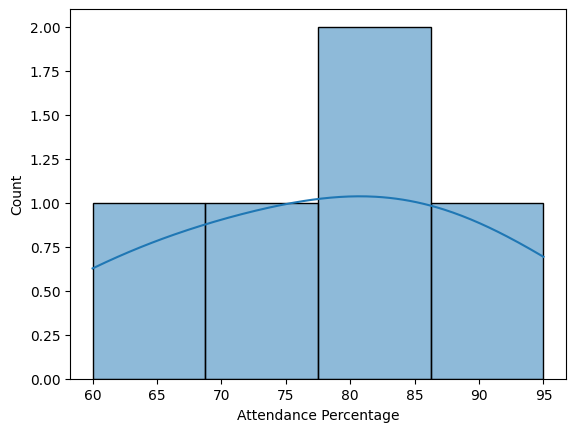

In [19]:
# Check the distribution of 'Attendance Percentage' variable
sns.histplot(df['Attendance Percentage'], kde=True)
plt.show()

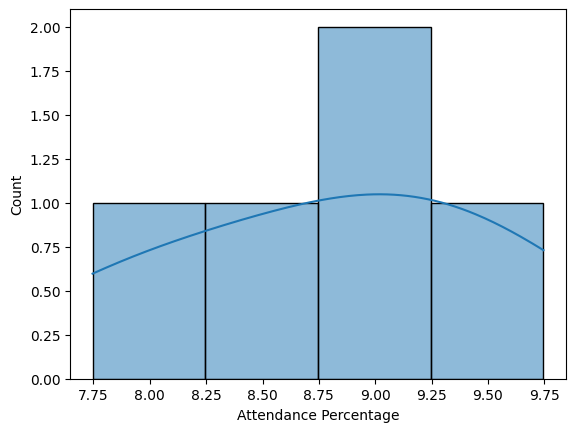

In [20]:
# Apply square root transformation
df['Attendance Percentage'] = np.sqrt(df['Attendance Percentage'])

# Check the transformed distribution
sns.histplot(df['Attendance Percentage'], kde=True)
plt.show()